**Remember to run all Python code in a virtual environment**

Import the recommended libraries and modules to use for the activity. (You are free to import other modules you wish to use.)

For installment you may use:

`pip install pandas, matplotlib, numpy, nltk, scikit-learn`

In [144]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [145]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [146]:
%pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [147]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [148]:
%pip list

Package             Version
------------------- ------------
asttokens           2.4.0
backcall            0.2.0
click               8.1.7
colorama            0.4.6
comm                0.1.4
contourpy           1.1.0
cycler              0.11.0
debugpy             1.8.0
decorator           5.1.1
exceptiongroup      1.1.3
executing           1.2.0
fonttools           4.42.1
importlib-metadata  6.8.0
importlib-resources 6.0.1
ipykernel           6.25.2
ipython             8.15.0
jedi                0.19.0
joblib              1.3.2
jupyter_client      8.3.1
jupyter_core        5.3.1
kiwisolver          1.4.5
matplotlib          3.7.3
matplotlib-inline   0.1.6
nest-asyncio        1.5.7
nltk                3.8.1
numpy               1.25.2
packaging           23.1
pandas              2.1.0
parso               0.8.3
pickleshare         0.7.5
Pillow              10.0.0
pip                 23.2.1
platformdirs        3.10.0
prompt-toolkit      3.0.39
psutil              5.9.5
pure-eval           

In [149]:
import pandas as pd
import re #for using regular expressions
import matplotlib.pyplot as plt
import numpy as np

import nltk #for text preprocessing
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download("wordnet")

from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\WDIMACULANGAN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\WDIMACULANGAN\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Load the movies dataset into a pandas dataframe. Name the dataframe `movies_df`. 

Check the first 5 rows and briefly plan the pre-processing steps needed for the data.

In [150]:
movies_df = pd.read_csv("dataset/movies.csv")
movies_df.head(5)

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN


Check the null values in the dataset with `.info()`

In [151]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MOVIES    9999 non-null   object 
 1   YEAR      9355 non-null   object 
 2   GENRE     9919 non-null   object 
 3   RATING    8179 non-null   float64
 4   ONE-LINE  9999 non-null   object 
 5   STARS     9999 non-null   object 
 6   VOTES     8179 non-null   object 
 7   RunTime   7041 non-null   float64
 8   Gross     460 non-null    object 
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [152]:
# Number of null values per column
movies_df.isnull().sum()

MOVIES         0
YEAR         644
GENRE         80
RATING      1820
ONE-LINE       0
STARS          0
VOTES       1820
RunTime     2958
Gross       9539
dtype: int64

Remove duplicates, if necessary.

In [153]:
# Checks for duplicate rows
print(movies_df.duplicated().values.any())
print(movies_df.shape)


True
(9999, 9)


In [154]:
# Dropped duplicates
dropped_movies_df = movies_df.drop_duplicates()
dropped_movies_df.shape

(9568, 9)

Remove columns, if necessary.

In [155]:
dropped_movies_df.isnull().sum()

MOVIES         0
YEAR         542
GENRE         78
RATING      1400
ONE-LINE       0
STARS          0
VOTES       1400
RunTime     2560
Gross       9108
dtype: int64

Since there are 9568 rows left but 9108 rows are null, this column will be dropped

In [156]:
dropped_movies_df = dropped_movies_df.drop(columns="Gross")
dropped_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9568 entries, 0 to 9998
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MOVIES    9568 non-null   object 
 1   YEAR      9026 non-null   object 
 2   GENRE     9490 non-null   object 
 3   RATING    8168 non-null   float64
 4   ONE-LINE  9568 non-null   object 
 5   STARS     9568 non-null   object 
 6   VOTES     8168 non-null   object 
 7   RunTime   7008 non-null   float64
dtypes: float64(2), object(6)
memory usage: 672.8+ KB


Remove rows with null values, if necessary.

In [157]:
# Drop null values with more than 1 columns null
dropped_movies_df.dropna(inplace=True)
dropped_movies_df.shape

(6779, 8)

How many rows are left in the dataset?

- There are 6779 rows left in the dataset.

Remove any impossible values in the `RATING` and `RunTime` columns. 

(Ratings should be from 0 - 10, while RunTime must be positive.)

In [158]:
dropped_movies_df[dropped_movies_df['RunTime'] == 853 ]

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime
1902,El tiempo entre costuras,(2013–2014),"\nAdventure, Drama, History",8.3,\nSira Quiroga is a young Spanish dressmaker e...,"\n \n Stars:\nAdriana Ugarte, \n...","3,876",853.0


In [159]:
dropped_movies_df = dropped_movies_df[dropped_movies_df['RATING'] > 0 ]
dropped_movies_df =  dropped_movies_df[dropped_movies_df['RATING'] < 10]
dropped_movies_df = dropped_movies_df[dropped_movies_df['RunTime'] > 0 ]

In [160]:
# Check outliers
dropped_movies_df.describe()

,RATING,RunTime
count,6779.000000,6779.000000
mean,6.861543,69.438708
std,1.244754,47.492236
min,1.100000,1.000000
25%,6.100000,37.000000
50%,7.000000,60.000000
75%,7.750000,95.000000
max,9.900000,853.000000


According to the `describe()` function, there is a movie that is max 853. To see if there are any other data points whose runtimes, let us visualize using scatterplot.

In [161]:
# plt.figure(figsize=(10, 6))
# plt.scatter(dropped_movies_df['MOVIES'], dropped_movies_df['RunTime'], c ="blue", marker="*")
# plt.savefig("scatterplot.png")

Notice that the columns `ONE-LINE`, `STARS`, and `GENRE` have newline characters imbedded in the text. Transform the text in these columns to remove the newline characters.

Hint: You may use regular expressions for this part.

In [162]:
dropped_movies_df.head()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0
5,Outer Banks,(2020– ),"\nAction, Crime, Drama",7.6,\nA group of teenagers from the wrong side of ...,"\n \n Stars:\nChase Stokes, \nMa...","25,858",50.0


In [163]:
dropped_movies_df['ONE-LINE'] = dropped_movies_df['ONE-LINE'].replace('\n', '', regex=True)
dropped_movies_df['STARS'] = dropped_movies_df['STARS'].replace('\n', '', regex=True)
dropped_movies_df['GENRE'] = dropped_movies_df['GENRE'].replace('\n', '', regex=True)
dropped_movies_df.head()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime
0,Blood Red Sky,(2021),"Action, Horror, Thriller",6.1,A woman with a mysterious illness is forced in...,Director:Peter Thorwarth| Stars:Peri B...,"21,062",121.0
1,Masters of the Universe: Revelation,(2021– ),"Animation, Action, Adventure",5.0,The war for Eternia begins again in what may b...,"Stars:Chris Wood, Sarah Michel...","17,870",25.0
2,The Walking Dead,(2010–2022),"Drama, Horror, Thriller",8.2,Sheriff Deputy Rick Grimes wakes up from a com...,"Stars:Andrew Lincoln, Norman R...","885,805",44.0
3,Rick and Morty,(2013– ),"Animation, Adventure, Comedy",9.2,An animated series that follows the exploits o...,"Stars:Justin Roiland, Chris Pa...","414,849",23.0
5,Outer Banks,(2020– ),"Action, Crime, Drama",7.6,A group of teenagers from the wrong side of th...,"Stars:Chase Stokes, Madelyn Cl...","25,858",50.0


Transform the `GENRE` column such that values are lists of genres for each row. Make sure values are actual python lists.

Ex. `[Action, Horror, Thriller]`

In [199]:
temp = dropped_movies_df.copy()
temp2 = temp['GENRE'].str.split(',')
# temp2 = temp2.str.strip()
print(temp2)
print(temp2[9962])
print(temp2.shape)


0           [Action,  Horror,  Thriller            ]
1       [Animation,  Action,  Adventure            ]
2            [Drama,  Horror,  Thriller            ]
3       [Animation,  Adventure,  Comedy            ]
5               [Action,  Crime,  Drama            ]
                            ...                     
9959                    [Comedy,  Drama            ]
9960                    [Comedy,  Drama            ]
9961                    [Comedy,  Drama            ]
9962                    [Comedy,  Drama            ]
9963    [Animation,  Action,  Adventure            ]
Name: GENRE, Length: 6779, dtype: object
['Comedy', ' Drama            ']
(6779,)


In [206]:
temp = dropped_movies_df.copy()
temp['GENRE'] = temp['GENRE'].str.split(",")
print(temp.loc[0].at['GENRE'])
print(temp.loc[0].at['GENRE'][1])
print(temp.loc[0].at['GENRE'][1].replace(" ", ""))
print(type(temp.loc[0].at['GENRE']))
temp.head()

['Action', ' Horror', ' Thriller            ']
 Horror
Horror
<class 'list'>


,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime
0,Blood Red Sky,(2021),"[Action, Horror, Thriller ]",6.1,A woman with a mysterious illness is forced in...,Director:Peter Thorwarth| Stars:Peri B...,"21,062",121.0
1,Masters of the Universe: Revelation,(2021– ),"[Animation, Action, Adventure ]",5.0,The war for Eternia begins again in what may b...,"Stars:Chris Wood, Sarah Michel...","17,870",25.0
2,The Walking Dead,(2010–2022),"[Drama, Horror, Thriller ]",8.2,Sheriff Deputy Rick Grimes wakes up from a com...,"Stars:Andrew Lincoln, Norman R...","885,805",44.0
3,Rick and Morty,(2013– ),"[Animation, Adventure, Comedy ]",9.2,An animated series that follows the exploits o...,"Stars:Justin Roiland, Chris Pa...","414,849",23.0
5,Outer Banks,(2020– ),"[Action, Crime, Drama ]",7.6,A group of teenagers from the wrong side of th...,"Stars:Chase Stokes, Madelyn Cl...","25,858",50.0


In [188]:
# temp = dropped_movies_df.copy()
# temp['GENRE'] = temp['GENRE'].apply(lambda x: x.strip().split(','))
# print(temp.loc[0].at['GENRE'])
# print("Accessing character from string: ", ord(temp.loc[0].at['GENRE'][1][0]))
# print(type(temp.loc[0].at['GENRE']))
# temp.head()

['Action', ' Horror', ' Thriller']
Accessing character from string:  32
<class 'list'>


,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime
0,Blood Red Sky,(2021),"[Action, Horror, Thriller]",6.1,A woman with a mysterious illness is forced in...,Director:Peter Thorwarth| Stars:Peri B...,"21,062",121.0
1,Masters of the Universe: Revelation,(2021– ),"[Animation, Action, Adventure]",5.0,The war for Eternia begins again in what may b...,"Stars:Chris Wood, Sarah Michel...","17,870",25.0
2,The Walking Dead,(2010–2022),"[Drama, Horror, Thriller]",8.2,Sheriff Deputy Rick Grimes wakes up from a com...,"Stars:Andrew Lincoln, Norman R...","885,805",44.0
3,Rick and Morty,(2013– ),"[Animation, Adventure, Comedy]",9.2,An animated series that follows the exploits o...,"Stars:Justin Roiland, Chris Pa...","414,849",23.0
5,Outer Banks,(2020– ),"[Action, Crime, Drama]",7.6,A group of teenagers from the wrong side of th...,"Stars:Chase Stokes, Madelyn Cl...","25,858",50.0


In [207]:
temp = dropped_movies_df.copy()
temp['GENRE'] = temp['GENRE'].str.strip().str.split(", ")
print(temp.loc[0].at['GENRE'])
print("Accessing character from string: ", ord(temp.loc[0].at['GENRE'][1][0]))
print(type(temp.loc[0].at['GENRE']))
temp.head()

['Action', 'Horror', 'Thriller']
Accessing character from string:  72
<class 'list'>


,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime
0,Blood Red Sky,(2021),"[Action, Horror, Thriller]",6.1,A woman with a mysterious illness is forced in...,Director:Peter Thorwarth| Stars:Peri B...,"21,062",121.0
1,Masters of the Universe: Revelation,(2021– ),"[Animation, Action, Adventure]",5.0,The war for Eternia begins again in what may b...,"Stars:Chris Wood, Sarah Michel...","17,870",25.0
2,The Walking Dead,(2010–2022),"[Drama, Horror, Thriller]",8.2,Sheriff Deputy Rick Grimes wakes up from a com...,"Stars:Andrew Lincoln, Norman R...","885,805",44.0
3,Rick and Morty,(2013– ),"[Animation, Adventure, Comedy]",9.2,An animated series that follows the exploits o...,"Stars:Justin Roiland, Chris Pa...","414,849",23.0
5,Outer Banks,(2020– ),"[Action, Crime, Drama]",7.6,A group of teenagers from the wrong side of th...,"Stars:Chase Stokes, Madelyn Cl...","25,858",50.0


In [208]:
dropped_movies_df['GENRE'] = dropped_movies_df['GENRE'].str.strip().str.split(", ")
dropped_movies_df.head()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime
0,Blood Red Sky,(2021),"[Action, Horror, Thriller]",6.1,A woman with a mysterious illness is forced in...,Director:Peter Thorwarth| Stars:Peri B...,"21,062",121.0
1,Masters of the Universe: Revelation,(2021– ),"[Animation, Action, Adventure]",5.0,The war for Eternia begins again in what may b...,"Stars:Chris Wood, Sarah Michel...","17,870",25.0
2,The Walking Dead,(2010–2022),"[Drama, Horror, Thriller]",8.2,Sheriff Deputy Rick Grimes wakes up from a com...,"Stars:Andrew Lincoln, Norman R...","885,805",44.0
3,Rick and Morty,(2013– ),"[Animation, Adventure, Comedy]",9.2,An animated series that follows the exploits o...,"Stars:Justin Roiland, Chris Pa...","414,849",23.0
5,Outer Banks,(2020– ),"[Action, Crime, Drama]",7.6,A group of teenagers from the wrong side of th...,"Stars:Chase Stokes, Madelyn Cl...","25,858",50.0


Make a set of all genres in the dataset. Name the set `genre_set`.

How many genres are in the dataset?

In [217]:
genre_set = set(dropped_movies_df['GENRE'].explode())
genre_set


{'Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Film-Noir',
 'Game-Show',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'Reality-TV',
 'Romance',
 'Sci-Fi',
 'Short',
 'Sport',
 'Talk-Show',
 'Thriller',
 'War',
 'Western'}

Create a dictionary `genre_count_dict` with the count of rows assigned with each genre. Show the dictionary.

Ex. `{'Comedy': 100, 'Drama': 20, 'Musical': 150}`

In [219]:
from collections import Counter

genres = dropped_movies_df['GENRE'].explode()
genre_count_dict = Counter(genres)
genre_count_dict

Counter({'Drama': 2989,
         'Comedy': 2057,
         'Action': 1573,
         'Crime': 1182,
         'Animation': 1158,
         'Adventure': 1106,
         'Documentary': 960,
         'Thriller': 676,
         'Romance': 650,
         'Mystery': 637,
         'Horror': 394,
         'Fantasy': 382,
         'Family': 288,
         'Biography': 252,
         'History': 236,
         'Sci-Fi': 234,
         'Reality-TV': 181,
         'Short': 158,
         'Music': 156,
         'Sport': 117,
         'Game-Show': 74,
         'War': 44,
         'Musical': 34,
         'Western': 20,
         'Talk-Show': 17,
         'News': 16,
         'Film-Noir': 12})

Create a set `top_genre_set` containing the 5 genres with the most counts. What are the top 5 genres?

In [222]:
import operator
# Sort descending
top_genre_set = sorted(genre_count_dict.items(),key=operator.itemgetter(1),reverse=True)
top_genre_set = top_genre_set[:5]
print(top_genre_set)

[('Drama', 2989), ('Comedy', 2057), ('Action', 1573), ('Crime', 1182), ('Animation', 1158)]


Transform the genre column such that values contain a set of genres that are included in the `top_genre_set`. If a row has no assigned genre from the top 5 genres, its value will be the set `{Others}`.

Ex. 
- `{'top_genre1', 'top_genre2', 'top_genre3', 'top_genre5'}`
- `{'top_genre4'}`
- `{'Others'}`

How many rows have a `GENRE` of `{'Others'}`?

Transform the column `GENRE` using one-hot encoding. A value of 1 is assigned if the row belongs to a genre, and 0 if it does not. 

Name the new columns generated from one-hot encoding as `"GENRE_" + genre`.

Ex. `"GENRE_Comedy"`

Below is an example on how your transformed `GENRE` columns should look like.

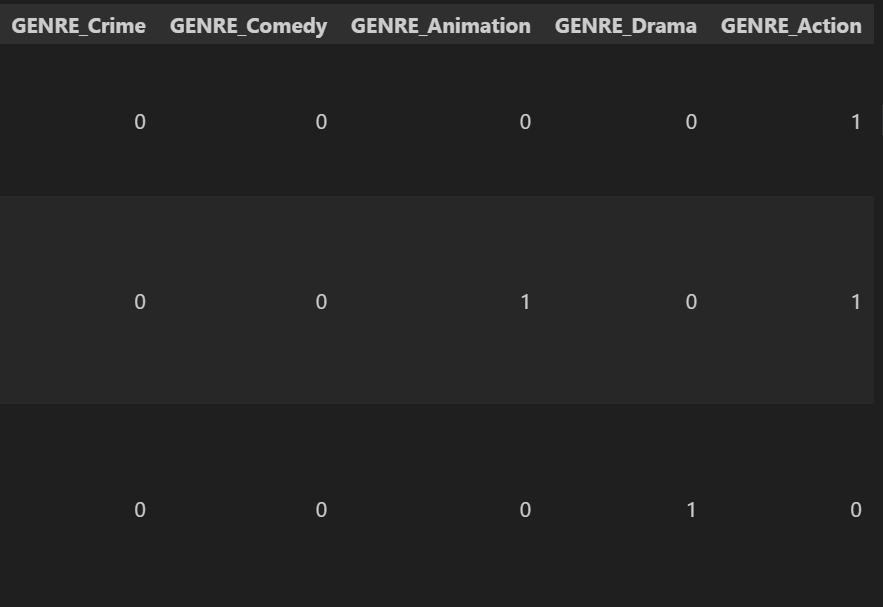

After transformation, remove the original (untransformed) `GENRE` column.

Transform `YEAR` column. Create a new column for `START_YEAR` and `END_YEAR`. For rows with no end year, assign it the same value as the start year.

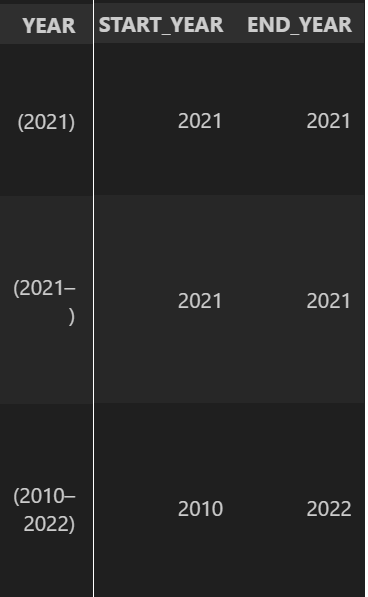

Remove the original (untransformed) `YEAR` column.

Check and remove rows with impossible values for `START_YEAR` and `END_YEAR`. (The first movie was made in 1888.)

Notice that the `VOTES` column is not of type integer because of the commas. Transform the `VOTES` column by removing the commas and converting the data type to integer.

Find and remove impossible values for votes (negative votes are not allowed).

Now let's pre-process the numerical columns `["RATING", "VOTES", "RunTime"]`. 

Slice `movies_df` to show the numerical columns of the first five rows.

Plot a histogram for each numerical column. Set `bins = 50`.

What can you say about the distribution of the data?

Check the skew of the data with `.skew()`.

Transform the columns with skewed data, if any. Use logarithm transform and square transform, if applicable.

If transformations were done for skewed data, recheck the skew of the data with `.skew()`. Is there an improvement in the skewness of the data? (Skew values closer to 0 are better as they are closer to a normal distribution.)

Again, plot the histogram for each numerical column. Is there an improvement in the distribution of data?

Now let's check our data for outliers. Use a boxplot to show the outliers in each numerical column.

Remove rows in the dataset with outliers in the numerical columns. Use the IQR of the data to calculate the lower and upper values of acceptable datapoints. Show the number of rows before and after removing outliers.

Hint: You may use numpy `percentile()` for IQR calculation. Set `method='midpoint'`.

If scaling is necessary for the numerical columns in the dataset, use `StandardScaler()`. If applicable, convert the output of the scaler back into a pandas dataframe.

### Text Preprocessing

Some columns with text data (`["ONE-LINE", "STARS"]`) have implicit missing values. Find the placeholder used for missing values by getting the mode of each column.

Show the number of rows with implicit missing values in each column in `["ONE-LINE", "STARS"]`.

Remove rows with implicit missing values. How many rows remain?

Create a function `preprocess_text` that transforms the text in `ONE-LINE` column with the following conditions:
- text only contains alphanumeric characters (A-Z and 0-9), spaces, and underscores.
- text is in lowercase
- English stop words are removed (Hint: you may use `stopwords` from nltk)
- text is lemmatized (Hint: you may use `WordNetLemmatizer` from nltk. Lemmatize twice, setting the `pos="n"`, then `pos="v"` for noun and verb lemmatization.)

Here's an example of how the function should work:
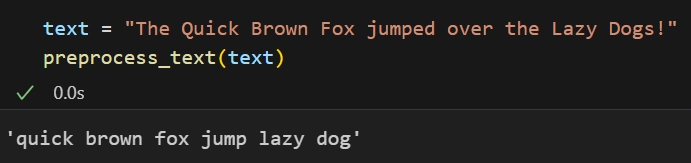


Apply the `preprocess_text` function to the `ONE-LINE` column.

For text vectorization of `ONE-LINE`, use `TfidfVectorizer()` and set `max_features = 1000`. 

Create a new pandas dataframe `one_line_df` with the output from the vectorizer. Make sure to assign feature names to the columns (Hint: You may use `.get_feature_names_out()` on the vectorizer).

Concatenate `movies_df` and `one_line_df` horizontally. Remove the original (untransformed) `ONE-LINE` column.

Lastly, using the different techniques taught in the lecture, pre-process the `STARS` column as you see fit. Transform the column to have data represented by numbers.